Question 1 

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
print(os.getcwd())

/content


In [138]:
df = pd.read_csv("D3.csv")
display(df)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


In [139]:
X1 = df.values[:, 0] #gets input from 1st column
X2 = df.values[:, 1] #gets input from 2nd column
X3 = df.values[:, 2] #gets input from 3rd column
Y = df.values[:, 3] #gets input from 4th column
len(Y), len(X1), len(X2), len(X3)

(100, 100, 100, 100)

In [140]:
#prints first five rows all the variables
print('X1 = ', X1[: 5]) 
print('X2 = ', X2[: 5])
print('X3 = ', X3[: 5])
print('Y = ', Y[: 5])
len(Y), len(X1), len(X2), len(X3)

X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
Y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]


(100, 100, 100, 100)

Explanatory variable 1: X1

Text(0.5, 1.0, 'X1 vs. Y')

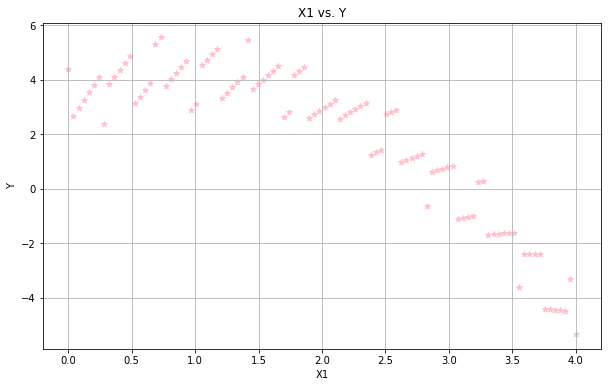

In [141]:
plt.scatter(X1, Y, color = 'pink', marker = '*')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('X1 vs. Y')

In [142]:
m = len(X1)
X1_1 = X1.reshape(m,1)
print('X_1', X1_1[:5,:])#outputs X1's first 5 rows, X1[0] - X1[4] so doesnt include 5th row  
m

X_1 [[0.        ]
 [0.04040404]
 [0.08080808]
 [0.12121212]
 [0.16161616]]


100

In [143]:
m = len(X1)
X1_0 = np.ones((m,1))
X1_0[:5], len(X1_0) # 5 rows of 1s with len(X1_0) at the end

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]), 100)

In [144]:
X1 = np.hstack((X1_0, X1_1))
X1[:5] #5 rows, 2 columns

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [145]:
# theta = np.zeros((2)) #needs to be the same as len(X1)
# theta.shape
theta = np.zeros(2)
iterations = 1500
alpha = .1 #learning rate 
theta.shape

(2,)

In [146]:
def compute_loss(X, Y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)#compares how far away the line is from the dots
  sqrErrors = np.square(errors)
  J = 1/(2*m) * np.sum(sqrErrors)
  return J

In [147]:
cost = compute_loss(X1, Y, theta)
print('The cost for given values of theta_0 and theta_1 = ', cost)

The cost for given values of theta_0 and theta_1 =  5.524438459196242


In [148]:
def gradient_descent(X, Y, theta, alpha, iterations):
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sum_delta = (alpha/m)*X.transpose().dot(errors)
    theta = theta - sum_delta
    cost_history[i] = compute_loss(X, Y, theta)
    
  return theta, cost_history

In [149]:
theta, cost_history = gradient_descent(X1, Y,theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history = ', cost_history)

Final value of theta = [ 5.92794892 -2.03833663]
cost_history =  [5.16999006 4.96338989 4.7855721  ... 0.98499308 0.98499308 0.98499308]


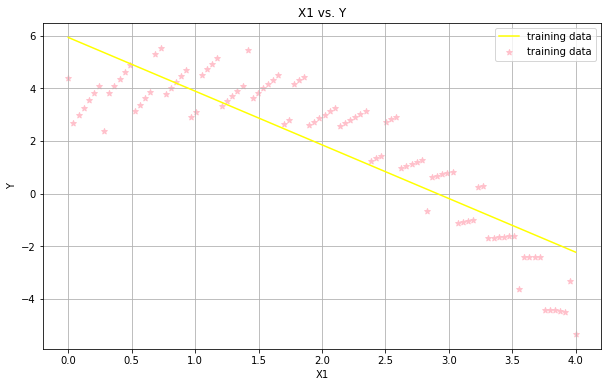

In [150]:
plt.scatter(X1[:,1], Y, color = 'pink', marker = '*', label = 'training data')
plt.plot(X1[:,1], X1.dot(theta), color = 'yellow', label = 'training data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('X1 vs. Y')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

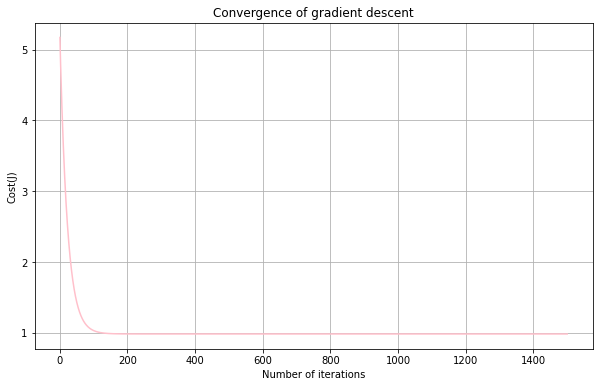

In [151]:
plt.plot(range(1, iterations + 1), cost_history, color = 'pink')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost(J)')
plt.title('Convergence of gradient descent')


Explanatory variable 2: X2

Text(0.5, 1.0, 'X2 vs. Y')

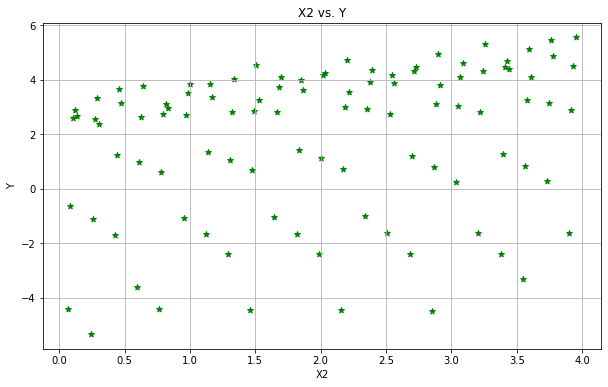

In [152]:
plt.scatter(X2, Y, color = 'green', marker = '*')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('X2 vs. Y')

In [153]:
m = len(X2)
X2_1 = X2.reshape(m,1)
print('X_2', X2_1[:5,:])#outputs X2's first 5 rows, X2[0] - X2[4] so doesnt include 5th row  

X_2 [[3.44      ]
 [0.1349495 ]
 [0.82989899]
 [1.52484848]
 [2.21979798]]


In [154]:
m = len(X2)
X2_0 = np.ones((m,1)) #1 column
X2_0[:5], len(X2_0) #5 rows of 1s with len(X2_0) at the end

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]), 100)

In [155]:
X2 = np.hstack((X2_0, X2_1))
X2[:5] #5 rows, 2 columns

array([[1.        , 3.44      ],
       [1.        , 0.1349495 ],
       [1.        , 0.82989899],
       [1.        , 1.52484848],
       [1.        , 2.21979798]])

In [156]:
cost = compute_loss(X2, Y, theta)
print('The cost for given values of theta_0 and theta_1 = ', cost)

The cost for given values of theta_0 and theta_1 =  8.182525826043467


In [157]:
theta, cost_history = gradient_descent(X2, Y,theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history = ', cost_history)

Final value of theta = [0.73606043 0.55760761]
cost_history =  [7.26987578 7.00288482 6.83790041 ... 3.59936602 3.59936602 3.59936602]


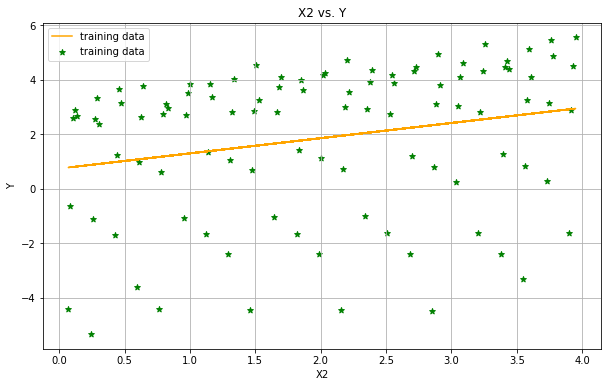

In [158]:
plt.scatter(X2[:,1], Y, color = 'green', marker = '*', label = 'training data')
plt.plot(X2[:,1], X2.dot(theta), color = 'orange', label = 'training data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('X2 vs. Y')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

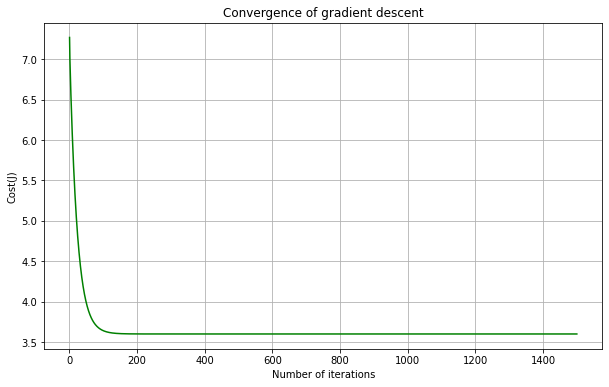

In [159]:
plt.plot(range(1, iterations + 1), cost_history, color = 'green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost(J)')
plt.title('Convergence of gradient descent')

Explanatory variable 3: X3

Text(0.5, 1.0, 'X3 vs. Y')

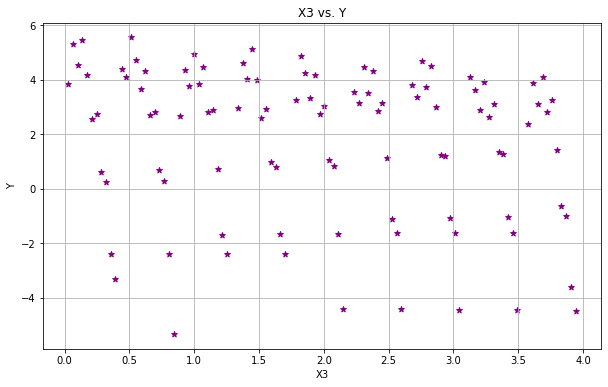

In [160]:
plt.scatter(X3, Y, color = 'purple', marker = '*')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('X3 vs. Y')

In [161]:
m = len(X3)
X3_1 = X3.reshape(m,1)
print('X_3', X3_1[:5,:])#outputs X3's first 5 rows, X3[0] - X3[4] so doesnt include 5th row 

X_3 [[0.44      ]
 [0.88848485]
 [1.3369697 ]
 [1.78545454]
 [2.23393939]]


In [162]:
m = len(X3)
X3_0 = np.ones((m,1))#1 column
X3_0[:5], len(X3_0) #5 rows pf 1s with len(X3_0) at the end

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]), 100)

In [163]:
X3 = np.hstack((X3_0, X3_1))
X3[:5] #5 rows, 2 columns

array([[1.        , 0.44      ],
       [1.        , 0.88848485],
       [1.        , 1.3369697 ],
       [1.        , 1.78545454],
       [1.        , 2.23393939]])

In [164]:
t = np.array([2.78048129 ,-0.48451631])
# b + w1 * x example -> 2.7 + (-0.48)(0.44) = 2.7 + -0.21
print((X3*t)[:5])

[[ 2.78048129 -0.21318718]
 [ 2.78048129 -0.4304854 ]
 [ 2.78048129 -0.64778362]
 [ 2.78048129 -0.86508185]
 [ 2.78048129 -1.08238007]]


In [165]:
print((X3.dot(t))[:5])

[2.56729411 2.34999589 2.13269767 1.91539944 1.69810122]


In [166]:
cost = compute_loss(X3, Y, theta)
print('The cost for given values of theta_0 and theta_1 = ', cost)

The cost for given values of theta_0 and theta_1 =  4.407877431359302


In [167]:
theta, cost_history = gradient_descent(X3, Y,theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history = ', cost_history)

Final value of theta = [ 2.8714221  -0.52048288]
cost_history =  [4.26200819 4.21568729 4.18664662 ... 3.62945112 3.62945112 3.62945112]


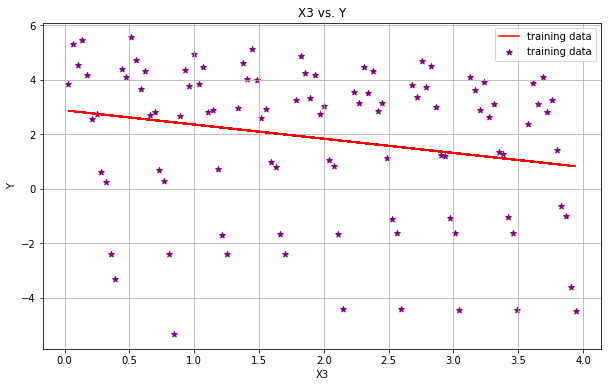

In [168]:
plt.scatter(X3[:,1], Y, color = 'purple', marker = '*', label = 'training data')
plt.plot(X3[:,1], X3.dot(theta), color = 'red', label = 'training data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('X3 vs. Y')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

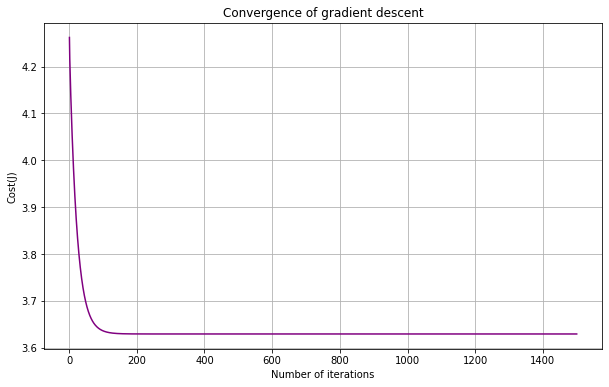

In [169]:
plt.plot(range(1, iterations + 1), cost_history, color = 'purple')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost(J)')
plt.title('Convergence of gradient descent')

Text(0.5, 1.0, 'X1,X2,X3 vs. Y')

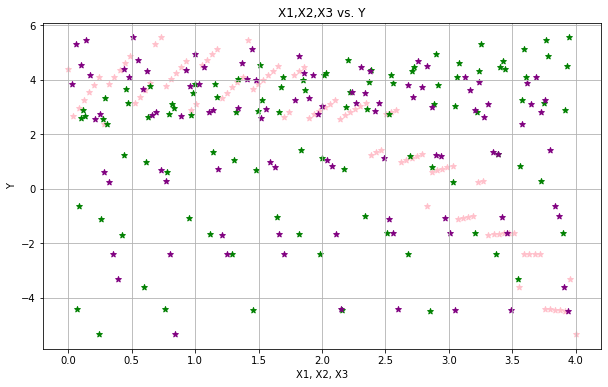

In [170]:
#print(X1[:,1:])
plt.scatter(X1[:,1], Y, color = 'pink', marker = '*')
#print(X2)
plt.scatter(X2[:,1], Y, color = 'green', marker = '*')
plt.scatter(X3[:,1], Y, color = 'purple', marker = '*')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('X1, X2, X3')
plt.ylabel('Y')
plt.title('X1,X2,X3 vs. Y')

In [171]:
m = len(X3)
X1 = df.values[:, 0] #gets input from 1st column
X2 = df.values[:, 1] #gets input from 2nd column
X3 = df.values[:, 2] #gets input from 3rd column
X1_1 = X1.reshape(m,1)
X2_1 = X2.reshape(m,1)
X3_1 = X3.reshape(m,1)
print('X_1', X1_1[:5,:])
print('X_2', X2_1[:5,:])
print('X_3', X3_1[:5,:])#outputs X3's first 5 rows, X3[0] - X3[4] so doesnt include 5th row 

X_1 [[0.        ]
 [0.04040404]
 [0.08080808]
 [0.12121212]
 [0.16161616]]
X_2 [[3.44      ]
 [0.1349495 ]
 [0.82989899]
 [1.52484848]
 [2.21979798]]
X_3 [[0.44      ]
 [0.88848485]
 [1.3369697 ]
 [1.78545454]
 [2.23393939]]


In [172]:
X_0 = np.ones((m,1))#1 column
X_0[:5], len(X_0) #5 rows of 1s with len(X3_0) at the end

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]), 100)

In [173]:
X = np.hstack((X_0, X1_1, X2_1, X3_1))
X[:5] #5 rows, 2 columns

array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939]])

In [174]:
theta = np.zeros(4) #needs to have the same amnt of columns as X3
iterations = 1500
alpha = 0.01 #learning rate
theta.shape

(4,)

In [175]:
theta, cost_history = gradient_descent(X, Y,theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history = ', cost_history)

Final value of theta = [ 4.15118728 -1.8394291   0.72473856 -0.09513266]
cost_history =  [5.21542243 4.97171977 4.7765543  ... 0.81079843 0.81065429 0.81051044]


Text(0.5, 1.0, 'Convergence of gradient descent')

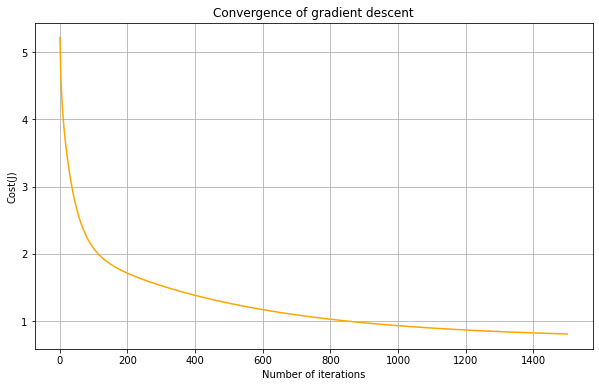

In [176]:
plt.plot(range(1, iterations + 1), cost_history, color = 'orange')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost(J)')
plt.title('Convergence of gradient descent')

4. Predict the value of y for new (X1, X2, X3) values (1, 1, 1), for (2, 0, 4), and for (3, 2, 1)

In [177]:
# b + w1*x1 + w2*x2 + w3*x3 = y/predition
# theta = [b,w1,w2,w3]
predX = np.array([1, 1, 1, 1])
predX2 = np.array([1, 2, 0, 4])
predX3 = np.array([1, 3, 2, 1])
print(predX.dot(theta))
print(predX2.dot(theta))
print(predX3.dot(theta))

2.9413640816645295
0.09179843075891586
-0.012755552822328889
